## 100DayOfMachineLearningCode
## Day_2 (KNearestNeighbors Classification Model)

### Implement different classification model on toy dataset i.e. iris

#### Import Libraries

In [1]:
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
%matplotlib inline

### load_iris()

In [3]:
iris= load_iris()

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### The above cell gives the complete information about the iris data set

In [5]:
data= iris.data

In [6]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
target= iris.target

In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
#create a dataframe 
df_iris= pd.DataFrame(data, columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [12]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
#add target variabel
df_iris['target']= iris.target

In [14]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
#checkout the no. of different target values
Counter(df_iris.target)

Counter({0: 50, 1: 50, 2: 50})

In [16]:
#all present in equal amoount

In [17]:
#check out the null values present there
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

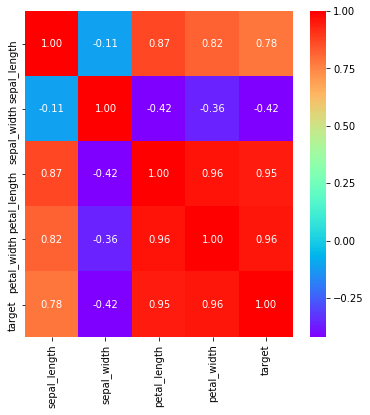

In [18]:
#check correlation between the features
corr= df_iris.corr()

#plot using heatmap
plt.figure(figsize= (6,6))
sns.heatmap(corr, annot= True, cmap= 'rainbow', fmt= '.2f')
plt.show()

Here, we observed all the features are highly +ve correlated with the target feature except the sepal_width(cm).
According to correlation map:
1. The highest contribution towards the target is petal_width(cm) and petal_length(cm), thus we can say that for knowing the type of leafs the parameter petal_length and petal_width are important.
2. sepal_width are -vely correlated faetures some it also responsible for finding the types.

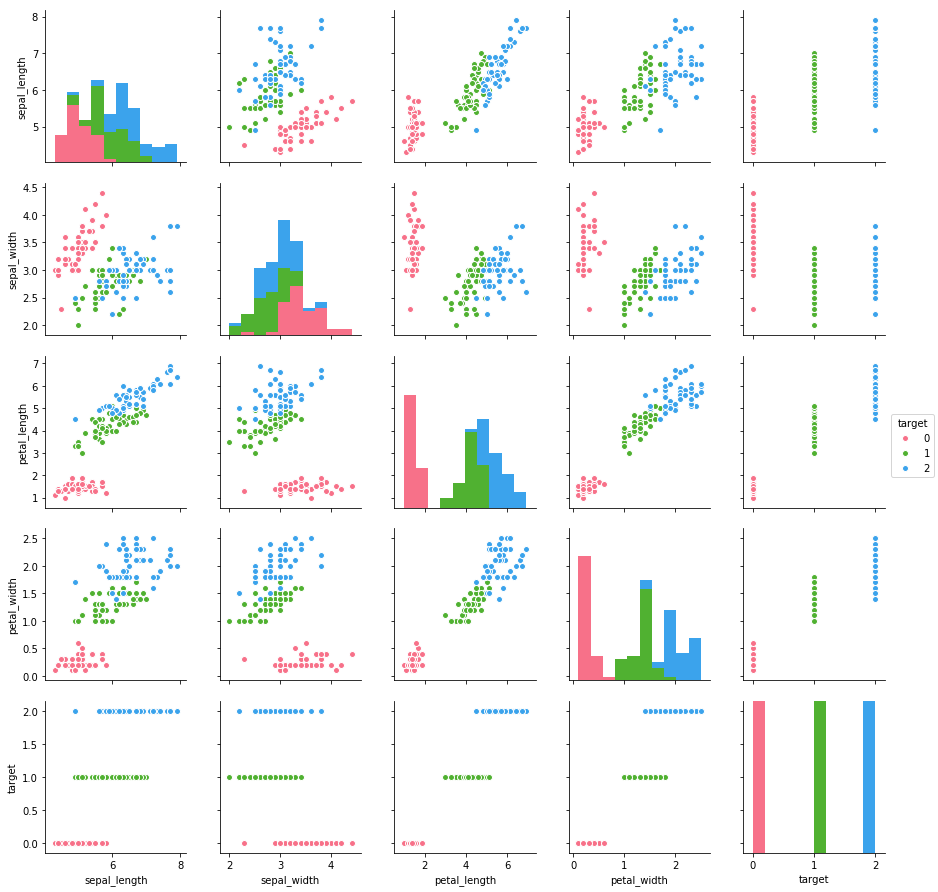

In [19]:
#pairplot 
sns.pairplot(df_iris, hue= 'target', palette= 'husl')

The above graph shows the pairplot the plotting between the features in overall aspects we can say that the multivariate plotting. Show the overall variation between the features and the target.

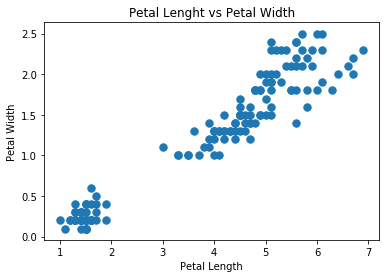

In [20]:
#petal length vs petal width
plt.scatter(df_iris['petal_length'], df_iris['petal_width'], cmap= 'Blues', s= 55)
plt.title('Petal Lenght vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

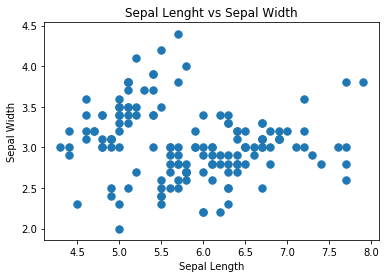

In [21]:
#sepal length vs sepal width
plt.scatter(df_iris['sepal_length'], df_iris['sepal_width'], cmap= 'Blues', s= 55)
plt.title('Sepal Lenght vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [22]:
#as we say above figures the petal length and petal width are highly correlated with other on the otherhand
#the correlation between the sepal length and sepal width are not so significant (sacttered more).

### Machine Learning modeling

In [23]:
#here, I created the function those find the accuracy of different model on the dataset.
def ml_modeling(model, train, target, name):
    '''Here,
            model: the model you want to fit 
            train: the training data
            target: the target data'''
    print('Uisng {}' .format(name))
    #split the data in training and validation set
    X_train, X_test, y_train, y_test= train_test_split(train, target) #it is standard by default it took 25% as validation set
    #fit the data in the model
    model.fit(X_train, y_train)
    
    #did prediction with the test data
    prediction= model.predict(X_test)
    
    #check the train and testing accuracy
    print('The training accuracy: {:.4f}' .format(model.score(X_train, y_train)))
    print('The testing accuracy: {:.4f}' .format(model.score(X_test, y_test)))
    
    return model.score(X_train, y_train), model.score(X_test, y_test)

In [24]:
train= df_iris.loc[:, df_iris.columns!= 'target'].values
target= df_iris.loc[:, ['target']].values

In [25]:
#Logistic Regression
clf_log= LogisticRegression()
ml_modeling(clf_log, train, target, 'Logistic Regression')

Uisng Logistic Regression
The training accuracy: 0.9375
The testing accuracy: 0.9737


C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9375, 0.9736842105263158)

In [26]:
#SVM 
clf_svm= SVR(kernel= 'linear')
ml_modeling(clf_svm, train, target, 'Support Vector Machine')

Uisng Support Vector Machine
The training accuracy: 0.9329
The testing accuracy: 0.9087


C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9329118259221948, 0.9086999889776086)

In [27]:
#Random Forest
clf_rf= RandomForestClassifier()
ml_modeling(clf_rf, train, target, 'Random Forest Classifier')

Uisng Random Forest Classifier
The training accuracy: 0.9911
The testing accuracy: 0.8947


C:\Users\sngupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


(0.9910714285714286, 0.8947368421052632)

In [28]:
#KNearestNeighbors
clf_knn= KNeighborsClassifier()
ml_modeling(clf_knn, train, target, 'KNearestNeighbors')

Uisng KNearestNeighbors
The training accuracy: 0.9554
The testing accuracy: 1.0000


C:\Users\sngupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


(0.9553571428571429, 1.0)

##### As you saw above this is how the accuracy of training and testing error varies on using different model.
##### Due to this thers are two case arised on the basis of accuracy, bias and variance
##### 1. Overfitting (where, the gap between the training and valodation accuracy is large, say case of high varianc and low bias)
##### 2. Underfitting (where, the gap between the training and validation accuracy is small, or say the validation accuracy is high, or say case of low variance and high bias)
##### Both the case are not good for the predictive modeling because due to this the thing you want to predict is not make significant results.

### KMeans

### Sepal Length vs Sepal Width

Sepal Length vs Sepal Width


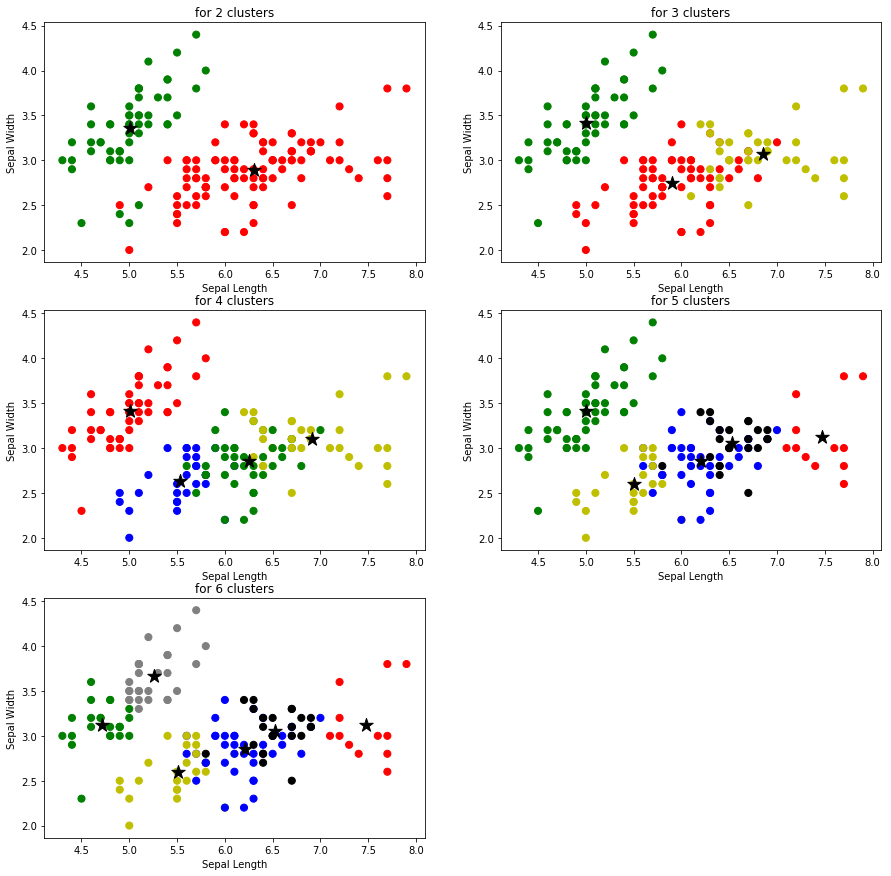

In [29]:
#use kmeans clustering to find the best value of K that increase the accuracy as well as overcome the problem of
#overfitting and underfitting
#I used elbow method to fing the best value of K
#take different values of K for the comparison
c= np.array(['r', 'g', 'y', 'b', 'black', 'grey'])
plt.figure(figsize= (15, 15))
K= [2, 3, 4, 5, 6]
print('Sepal Length vs Sepal Width')
for i, k in zip(range(1, len(K)+1), K):
    kmeans= KMeans(n_clusters= k, random_state= 42).fit(train)
    labels= kmeans.labels_
    centroid= kmeans.cluster_centers_
    
    plt.subplot(3, 2, i)
    plt.scatter(df_iris.loc[:, ['sepal_length']].values, df_iris.loc[:, ['sepal_width']].values, c= c[labels], marker= 'o', s= 50)
    plt.scatter(centroid[:,0], centroid[:, 1], marker= '*', s= 200, color= 'k')
    plt.title('for {} clusters' .format(k))
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
plt.show()

### Petal Length vs Petal Width

Petal Length vs Petal Width


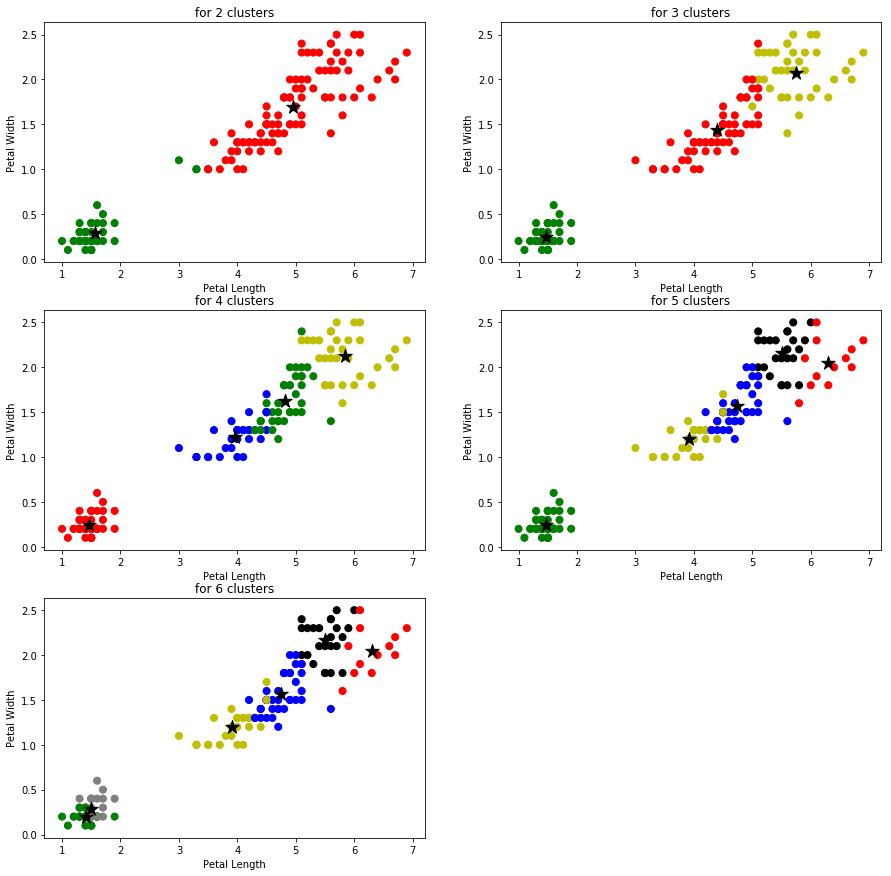

In [30]:
plt.figure(figsize= (15, 15))
K= [2, 3, 4, 5, 6]
print('Petal Length vs Petal Width')
for i, k in zip(range(1, len(K)+1), K):
    kmeans= KMeans(n_clusters= k, random_state= 42).fit(train)
    labels= kmeans.labels_
    centroid= kmeans.cluster_centers_
    
    plt.subplot(3, 2, i)
    plt.scatter(df_iris.loc[:, ['petal_length']].values, df_iris.loc[:, ['petal_width']].values, c= c[labels], marker= 'o', s= 50)
    plt.scatter(centroid[:,2], centroid[:, 3], marker= '*', s= 200, color= 'k')
    plt.title('for {} clusters' .format(k))
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
plt.show()

In the above diagram you can see that how the similar clusters elements converge on increasing the no. of clusters.
It is based on euclidean distance. On small no. of clusters it is quite scattered in nature not appropriately converged on the other hand for large no. of clusters it make the figure quite complex. That's why the no. of clusters is quite significant in between between the small and large no. of clusters.

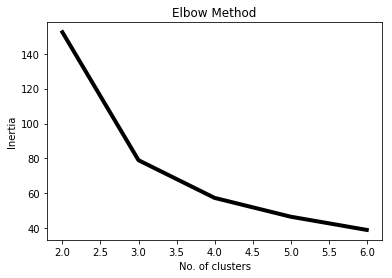

In [31]:
#check the appropriate no. of clusters using elbow method
cluster= []
for k in K:
    kmeans_1= KMeans(n_clusters= k).fit(train)
    cluster.append(kmeans_1.inertia_)

plt.plot(K, cluster, 'k-', lw= 4.0)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()

##### As you observed the above diagram no. of clusters= 3 is appropriate option for this dataset according to KMeans.

### Use KNearestNeighborsClassifier to check the appropriate no. of clusters

In [32]:
train_acc= []
test_acc= []

for k in K:
    clf_knn_= KNeighborsClassifier(n_neighbors= k)
    print('No. of Clusters= ', k)
    acc_1, acc_2= ml_modeling(clf_knn_, train, target, 'KNearestNeighbors')
    train_acc.append(acc_1)
    test_acc.append(acc_2)
    
#create a data frame using training accuracy, testing accuracy and no. of clusters
df_knn_check= pd.DataFrame({
    'Clusters': K,
    'Accuracy_train': train_acc,
    'Accuracy_test': test_acc
})

No. of Clusters=  2
Uisng KNearestNeighbors
The training accuracy: 0.9821
The testing accuracy: 0.9474
No. of Clusters=  3
Uisng KNearestNeighbors
The training accuracy: 0.9643
The testing accuracy: 0.9737
No. of Clusters=  4
Uisng KNearestNeighbors
The training accuracy: 0.9643
The testing accuracy: 0.9737
No. of Clusters=  5
Uisng KNearestNeighbors
The training accuracy: 0.9821
The testing accuracy: 0.9474
No. of Clusters=  6
Uisng KNearestNeighbors
The training accuracy: 0.9643
The testing accuracy: 0.9737


C:\Users\sngupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [33]:
#print the df_knn_check
df_knn_check

,Accuracy_test,Accuracy_train,Clusters
0,0.947368,0.982143,2
1,0.973684,0.964286,3
2,0.973684,0.964286,4
3,0.947368,0.982143,5
4,0.973684,0.964286,6


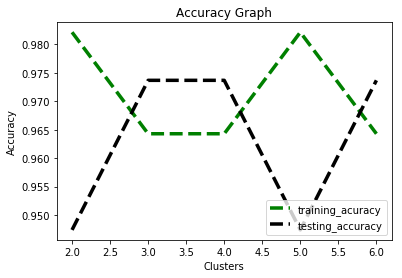

In [34]:
plt.plot(df_knn_check['Clusters'], df_knn_check['Accuracy_train'], 'g--', lw= 3.5, label= 'training_acuracy')
plt.plot(df_knn_check['Clusters'], df_knn_check['Accuracy_test'], 'k--', lw= 3.5, label= 'testing_accuracy')
plt.xlabel('Clusters')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend(loc= 4)
plt.show()

#### The no. of clusters= 3 is the best option using KNearestNeighborsClassifier.